In [ ]:
import pandas as pd

In [ ]:
df = pd.read_json('modified_dataframe.json')
df.head()

,link,headline,category,short_description,authors,date,full_text
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23,U.S. health officials say 4.4 million American...
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23,A volatile passenger has been charged with a f...
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23,"Woof — it’s been a long, long week. We don’t h..."
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23,"Kids may say the darndest things, but parents ..."
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22,A white woman who said that she was unfairly f...


In [ ]:
df.iloc[0].full_text

'U.S. health officials say 4.4 million Americans have rolled up their sleeves for the updated COVID-19 booster shot. The Centers for Disease Control and Prevention posted the count Thursday as public health experts bemoaned President Joe Biden’s recent remark that “the pandemic is over.”The White House said more than 5 million people received the new boosters by its own estimate that accounts for reporting lags in states.Health experts said it is too early to predict whether demand would match up with the 171 million doses of the new boosters the U.S. ordered for the fall.“No one would go looking at our flu shot uptake at this point and be like, ‘Oh, what a disaster,’” said Dr. David Dowdy, an infectious disease epidemiologist at Johns Hopkins Bloomberg School of Public Health. “If we start to see a large uptick in cases, I think we’re going to see a lot of people getting the (new COVID) vaccine.”A temporary shortage of Moderna vaccine caused some pharmacies to cancel appointments whil

In [ ]:
df.iloc[0].short_description

'Health experts said it is too early to predict whether demand would match up with the 171 million doses of the new boosters the U.S. ordered for the fall.'

In [ ]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

from summarizer import Summarizer
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install summarizer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.1/280.1 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for summarizer: filename=summarizer-0.0.7-py2.py3-none-any.whl size=284224 sha256=0b653ad4af2cccd81947f0fa521efc178319730f9238cc3fa1002fa9cd4d7d61
  Stored in directory: /root/.cache/pip/wheels/20/bb/2d/1fe057c2f729818a5f28c312c3667e8b9d5cfd4af4a39895e7
Successfully built summarizer


In [ ]:
!pip install bert-extractive-summarizer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 59.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 32.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 117.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 79.0 MB/s eta 0:00:00


In [ ]:
!pip install transformers

In [ ]:
!pip install spacy

In [ ]:
df['full_text'].str.len().max()

72581

In [ ]:
df['full_text'].str.len().min()

0

In [ ]:
df[df['full_text'].str.len() == 0]

,link,headline,category,short_description,authors,date,full_text
1970,https://www.huffpost.com/entry/coronavirus-us-...,"Biden Easing Foreign Travel Restrictions, Requ...",U.S. NEWS,President Joe Biden will ease foreign travel r...,"ZEKE MILLER, AP",2021-09-20,
4800,https://www.huffpost.com/entry/pro-publica-cal...,How New York Suffered Nearly 10 Times The Numb...,U.S. NEWS,California’s governor and San Francisco’s mayo...,"Joe Sexton and Joaquin Sapien, ProPublica",2020-05-17,
5014,https://www.huffpost.com/entry/coronavirus-gri...,Coronavirus And Grief: Everything You Need To ...,WELLNESS,"You can grieve loved ones, your job, normalcy ...",Lindsay Holmes,2020-04-10,
10657,https://www.huffingtonpost.com/entry/claire-da...,Claire Danes Is Done With 'Homeland',ENTERTAINMENT,The actress said Season 8 will be the last.,Ron Dicker,2018-04-19,
11271,https://www.huffingtonpost.com/entry/john-kras...,John Krasinski's 'A Quiet Place' Is Basically ...,ENTERTAINMENT,People could not resist comparing the TV show ...,Jenna Amatulli,2018-04-09,
12344,https://www.huffingtonpost.com/entry/stranger-...,'Stranger Things' Actors Scare Up Monstrous Ra...,ENTERTAINMENT,One cast member reportedly received the bigges...,Ron Dicker,2018-03-20,
17191,https://www.huffingtonpost.com/entry/women-mak...,Women Make History In Dominating 2017 Movie Bo...,ENTERTAINMENT,This shift is long overdue.,Ron Dicker,2018-01-02,
18988,https://www.huffingtonpost.com/entry/roy-moore...,Doug Jones Hits At Opponent Roy Moore: 'Men Wh...,POLITICS,"""It’s never too late for a man to be held acco...",Jenna Amatulli,2017-12-05,


In [ ]:
df[df['full_text'].str.startswith('Failed to retrieve the web page')]

,link,headline,category,short_description,authors,date,full_text
5165,https://www.huffpost.com/entry/nyc-mayor-defen...,NYC Mayor Fears Schools Shut Down Over Coronav...,U.S. NEWS,Critics of Bill de Blasio's plan say keeping t...,Nina Golgowski,2020-03-15,Failed to retrieve the web page. Status code: 502
5774,https://www.huffpost.com/entry/snl-impeachment...,"Jon Hamm's Bill Taylor Kisses, Tells And 'Take...",COMEDY,"""Mitch McConnell's"" favorite word on the cold ...",Mary Papenfuss,2019-11-17,Failed to retrieve the web page. Status code: 502
11264,https://www.huffingtonpost.com/entry/broad-cit...,'Broad City' Star Abbi Jacobson Discusses Her ...,QUEER VOICES,"The writer-actress says the people she dates ""...",Curtis M. Wong,2018-04-09,Failed to retrieve the web page. Status code: 502
16488,https://www.huffingtonpost.com/entry/moira-don...,Moira Donegan Outs Herself As Creator Of 'S**t...,MEDIA,"The writer, who's been hailed a hero, describe...",Dominique Mosbergen,2018-01-11,Failed to retrieve the web page. Status code: 500
18679,https://www.huffingtonpost.com/entry/al-franke...,Al Franken Deserved Better Than A Political Ex...,POLITICS,Senator Al Franken announced his resignation y...,"David Edward Burke, ContributorPresident, www....",2017-12-08,Failed to retrieve the web page. Status code: 428
18807,https://www.huffingtonpost.com/entry/toeing-th...,Toeing The Race Line: What I Am And What I Am ...,WOMEN,Embracing my ethnic and cultural identity was ...,"Kristie De Garis, ContributorPhotographer. Wri...",2017-12-07,Failed to retrieve the web page. Status code: 428
19696,https://www.huffingtonpost.com/entry/ok-go-obs...,OK Go Makes Serious Paper With Hypnotizing New...,ENTERTAINMENT,Warning: It contains flashing imagery.,Lee Moran,2017-11-25,Failed to retrieve the web page. Status code: 500


In [ ]:
df = df[~df['full_text'].str.startswith('Failed to retrieve the web page')]
df = df[df['full_text'].str.len() != 0]

In [ ]:
df.describe()

<ipython-input-18-ea8415b8a3ee>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe()


,link,headline,category,short_description,authors,date,full_text
count,19363,19363,19363,19363,19363,19363,19363
unique,19363,19290,36,19303,2545,1769,19223
top,https://www.huffpost.com/entry/covid-boosters-...,The 20 Funniest Tweets From Women This Week,POLITICS,The 25 most profound “Shower Thoughts” on Redd...,Lee Moran,2017-11-30 00:00:00,"Kids may say the darndest things, but parents ..."
freq,1,24,6629,18,1308,97,18
first,NaN,NaN,NaN,NaN,NaN,2017-11-20 00:00:00,NaN
last,NaN,NaN,NaN,NaN,NaN,2022-09-23 00:00:00,NaN


In [ ]:
df['full_text'].str.len().min()

50

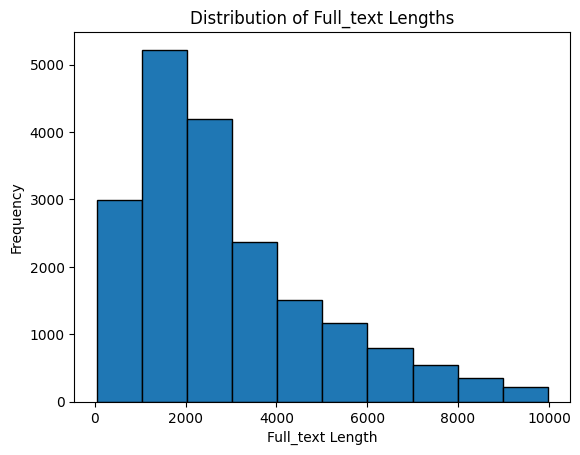

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


value_lengths = df['full_text'].str.len()

# Create a histogram of value lengths
plt.hist(value_lengths, bins=10, edgecolor='k')
plt.xlabel('Full_text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Full_text Lengths')
plt.show()

In [ ]:
df = df[df['full_text'].str.len() < 10000]

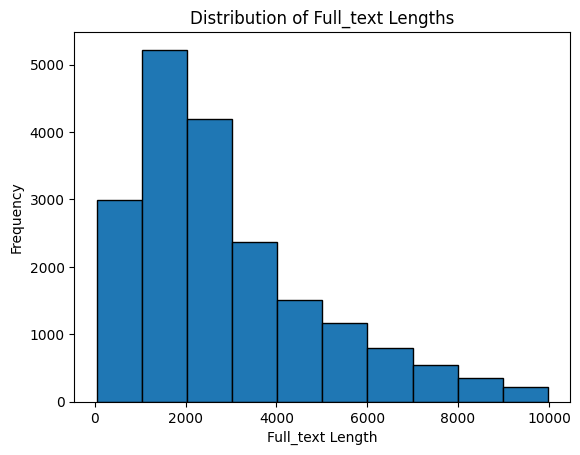

In [ ]:
value_lengths = df['full_text'].str.len()

plt.hist(value_lengths, bins=10, edgecolor='k')
plt.xlabel('Full_text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Full_text Lengths')
plt.show()

In [ ]:
from evaluate import load

metric = load("rouge")

In [ ]:
!pip install evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 293.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.8 MB/s eta 0:00:00


In [ ]:
!pip install rouge_score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24932 sha256=1180bcf538c699f34ea1976cf7de408d16f540baf08a115cd726794625b24797
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score


In [ ]:
preds = ["It is just the same text"]
labels = ["It is just the same text"]
metric.compute(predictions=preds, references=labels)

{'rouge1': 1.0, 'rouge2': 1.0, 'rougeL': 1.0, 'rougeLsum': 1.0}

In [ ]:
preds1 = ["It is just the same text"]
labels1 = ["Probably it is the similar text"]
metric.compute(predictions=preds1, references=labels1)

{'rouge1': 0.6666666666666666,
 'rouge2': 0.20000000000000004,
 'rougeL': 0.6666666666666666,
 'rougeLsum': 0.6666666666666666}

In [ ]:
def test_summarize(summarizer, df, id):
  text = df["full_text"].iloc[id]
  result = summarizer(text, max_length = 200)
  print("Original text: " + text)
  print("Result: " + result)
  print("Defined summary:" + df["short_description"].iloc[id])
  print(metric.compute(predictions=[result], references=[text]))

In [ ]:
from summarizer import Summarizer,TransformerSummarizer

bert_model = Summarizer()

ImportError: ignored

In [ ]:
test_summarize(bert_model, df, 0)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Original text: U.S. health officials say 4.4 million Americans have rolled up their sleeves for the updated COVID-19 booster shot. The Centers for Disease Control and Prevention posted the count Thursday as public health experts bemoaned President Joe Biden’s recent remark that “the pandemic is over.”The White House said more than 5 million people received the new boosters by its own estimate that accounts for reporting lags in states.Health experts said it is too early to predict whether demand would match up with the 171 million doses of the new boosters the U.S. ordered for the fall.“No one would go looking at our flu shot uptake at this point and be like, ‘Oh, what a disaster,’” said Dr. David Dowdy, an infectious disease epidemiologist at Johns Hopkins Bloomberg School of Public Health. “If we start to see a large uptick in cases, I think we’re going to see a lot of people getting the (new COVID) vaccine.”A temporary shortage of Moderna vaccine caused some pharmacies to cancel app

In [ ]:
def calculate_rouge_scores(df, summarizer):
  results = []
  expected = []

  for index, row in df.iterrows():
    result = summarizer(row['full_text'], max_length = 200)
    results.append(result)
    expected.append(row['short_description'])

  print(metric.compute(predictions=results, references=expected))

In [ ]:
calculate_rouge_scores(df[:100], bert_model)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

{'rouge1': 0.1877559303088684, 'rouge2': 0.0665336101921209, 'rougeL': 0.13987808402023594, 'rougeLsum': 0.14019508525654084}


In [ ]:
bert_model = Summarizer()
first = bert_model(df["full_text"].iloc[0], max_length=200)

Downloading:   0%|          | 0.00/571 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.25G [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-large-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

'This profile is part of our Culture Shifters series, which highlights people who are changing the way we think about the world around us. She gives me the book, recounting how it completely changed her life. While the “Eat, Pray, Love” author might have bettered Aster’s insight into her own creativity, it’s not the only thing that changed the course of her life. To survive, Isla Crown must lie, cheat, betray even as love complicates everything. Aster and her publisher, Abrams Books, have used TikTok ever since to help market the novel. The year’s worth of daily TikTok posts and Instagram questionnaires were well worth the time and effort, despite the naysayers. And this might be the new norm for up-and-coming authors of this generation and those who come after. I get to interact with people in a way that maybe wasn’t possible before. I have failed way more than I’ve succeeded in my life. Also, industry plants in publishing are not a thing. She knows how to relate to the audience she’s

In [ ]:
%%time
bert_model(df["full_text"].iloc[0], max_length=200)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


CPU times: user 1.91 s, sys: 837 ms, total: 2.75 s
Wall time: 1.51 s


'U.S. health officials say 4.4 million Americans have rolled up their sleeves for the updated COVID-19 booster shot. ”A temporary shortage of Moderna vaccine caused some pharmacies to cancel appointments while encouraging people to reschedule for a Pfizer vaccine. We’re just getting our education campaign going. ”Some Americans who plan to get the shot, designed to target the most common omicron strains, said they are waiting because they either had COVID-19 recently or another booster. The initial comment didn’t bother Murphy. The summer ebb in case numbers, hospitalizations and deaths may be followed by another surge, Dowdy said. I think that we have to do better as a nation. Everybody seems to be in pretty good shape. “Any time you have mixed messages, it’s detrimental to the public health effort,” Michaud said. “ ”New York City photographer Vivienne Gucwa, 44, got the new booster Monday. I was kind of thrilled to see the boosters were updated.'

In [ ]:
bert_model(text["full_text"].iloc[0])

'GENEVA (AP) — FIFA came under pressure Wednesday from several European soccer federations who want their captains to wear an armband with a rainbow heart design during World Cup games in Qatar to campaign against discrimination. France and Germany, the last two World Cup champions, were among eight of the 13 European soccer teams going to Qatar who joined the “One Love” campaign, which started in the Netherlands. FIFA did not immediately comment on the request. Before the game, FIFA and European soccer body UEFA banned Russian teams from international competitions because the country invaded Ukraine. England and Wales were among the federations Wednesday acknowledging progress made in Qatar since the wealthy emirate won the World Cup hosting vote in December 2010.However, the English federation said players would meet with some migrant workers who will be invited to its training camp in Al Wakrah. Amnesty International has suggested FIFA should pay $440 million in reparations to equal

In [ ]:
xlnet_model = TransformerSummarizer(transformer_type="XLNet",transformer_model_key="xlnet-base-cased")

NameError: ignored

In [ ]:
test_summarize(xlnet_model, df, 0)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Original text: U.S. health officials say 4.4 million Americans have rolled up their sleeves for the updated COVID-19 booster shot. The Centers for Disease Control and Prevention posted the count Thursday as public health experts bemoaned President Joe Biden’s recent remark that “the pandemic is over.”The White House said more than 5 million people received the new boosters by its own estimate that accounts for reporting lags in states.Health experts said it is too early to predict whether demand would match up with the 171 million doses of the new boosters the U.S. ordered for the fall.“No one would go looking at our flu shot uptake at this point and be like, ‘Oh, what a disaster,’” said Dr. David Dowdy, an infectious disease epidemiologist at Johns Hopkins Bloomberg School of Public Health. “If we start to see a large uptick in cases, I think we’re going to see a lot of people getting the (new COVID) vaccine.”A temporary shortage of Moderna vaccine caused some pharmacies to cancel app

In [ ]:
calculate_rouge_scores(df[:100], xlnet_model)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

{'rouge1': 0.19353251898203166, 'rouge2': 0.07120983746072723, 'rougeL': 0.14575759955358109, 'rougeLsum': 0.14570874994983762}


In [ ]:
%%time
xlnet_model(df["full_text"].iloc[0], max_length=200)

NameError: ignored

In [ ]:
!pip install SentencePiece

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 14.8 MB/s eta 0:00:00


In [ ]:
!pip install simplet5

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 34.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.7/527.7 kB 47.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 57.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 952.4/952.4 kB 64.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 880.6/880.6 kB 65.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for simplet5: filename=simplet5-0.1.4-py3-none-any.whl size=6854 sha256=61f5ce22157aae96e577a1f8efaf7383cad4af41368adadd3c2d3b104ebd3c4e
  Stored in directory: /root/.cache/pip/wheels/b4/7d/af/743765400878438a7593f13f89fdf4004dcde0f2a8e6cb6684
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895241 sha256=2967a59b7248e4bbd1322e9bf538879b87cc8070f81083bf3019a3ce729980e8
  Stored in directory: /root/.cache/pip/wheels/00/24/97/a2ea5324f36bc626e1ea0267f33db6aa80d157e

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
df=df.rename(columns={"short_description":"target_text", "full_text":"source_text"})
df=df[['source_text', 'target_text']]

In [ ]:
df

,source_text,target_text
0,U.S. health officials say 4.4 million American...,Health experts said it is too early to predict...
1,A volatile passenger has been charged with a f...,He was subdued by passengers and crew when he ...
2,"Woof — it’s been a long, long week. We don’t h...","""Until you have a dog you don't understand wha..."
3,"Kids may say the darndest things, but parents ...","""Accidentally put grown-up toothpaste on my to..."
4,A white woman who said that she was unfairly f...,Amy Cooper accused investment firm Franklin Te...
...,...,...
19995,Zimbabwe’s ruling ZANU-PF will discuss the imp...,He and his wife Grace would be granted full im...
19996,Transition is the name of the game in the Midd...,Transition is the name of the game in the Midd...
19997,MUNICH ― German Chancellor Angela Merkel annou...,The breakdown of coalition talks has plunged G...
19998,"In a major, thorough and truly important piece...","In a major, thorough and truly important piece..."


In [ ]:
df['source_text'] = "summarize:" + df['source_text']

In [ ]:
df

,source_text,target_text
45,summarize:This profile is part of our Culture ...,"The Colombian-American author's new book ""Ligh..."
63,summarize:Thanks to the upcoming retirement of...,Democrats in the state’s more moderate House d...
127,"summarize:To make a great radio hit in 1994, i...",The ‘Stay (I Missed You)’ artist reflects on p...
160,"summarize:BALTIMORE (AP) — On a hot, humid Eas...",American companies — including federal contrac...
177,summarize:Democrats in Congress were thrilled ...,Democrats were on the cusp of transforming pai...
...,...,...
19893,"summarize:Months later, Elizabeth Avellan woul...",A closer look at how a journalist coaxed a mov...
19908,"summarize:Charles Manson is dead now, and we a...",How Atomwaffen wants to make Helter Skelter real.
19963,summarize:He received a prestigious award from...,The enemy of our enemy is still a war criminal.
19971,summarize:My conversations with men have chang...,We must demand accountability from people who ...


In [ ]:
train_df, test_df = train_test_split(df, test_size=0.3)

In [ ]:
test_df.shape, train_df.shape

((5809, 2), (13554, 2))

In [ ]:
from simplet5 import SimpleT5

model = SimpleT5()
model.from_pretrained(model_type="t5", model_name="t5-base")

INFO:pytorch_lightning.utilities.seed:Global seed set to 42


Downloading:   0%|          | 0.00/773k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.32M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/850M [00:00<?, ?B/s]

In [ ]:
model.train(train_df=train_df,
           eval_df=test_df,
           source_max_token_len = 300,
           target_max_token_len = 120,
           batch_size=4,
           max_epochs=7,
          use_gpu=True)

INFO:pytorch_lightning.utilities.distributed:GPU available: True, used: True
INFO:pytorch_lightning.utilities.distributed:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.distributed:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.accelerators.gpu:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type                       | Params
-----------------------------------------------------
0 | model | T5ForConditionalGeneration | 222 M 
-----------------------------------------------------
222 M     Trainable params
0         Non-trainable params
222 M     Total params
891.614   Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.seed:Global seed set to 42


Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

In [ ]:
! (cd outputs; ls)

simplet5-epoch-0-train-loss-1.9404-val-loss-1.7795
simplet5-epoch-1-train-loss-1.6724-val-loss-1.7973
simplet5-epoch-2-train-loss-1.4648-val-loss-1.8417


In [ ]:
model.load_model("t5","outputs/simplet5-epoch-1-train-loss-1.6724-val-loss-1.7973", use_gpu=True )

In [ ]:
def test_summarize(summarizer, df, id):
  text = df["source_text"].iloc[id]
  result = summarizer.predict(text, max_length = 200)
  print("Original text: " + text)
  print("Result: " + result[0])
  print("Defined summary:" + df["target_text"].iloc[id])
  print(metric.compute(predictions=result, references=[df['target_text'].iloc[id]]))

In [ ]:
%%time
model.predict(df["source_text"].iloc[0])

CPU times: user 730 ms, sys: 1.95 ms, total: 732 ms
Wall time: 730 ms


["The president's remark about the COVID-19 pandemic has been widely condemned."]

In [ ]:
test_summarize(model, df, 0)

Original text: summarize:U.S. health officials say 4.4 million Americans have rolled up their sleeves for the updated COVID-19 booster shot. The Centers for Disease Control and Prevention posted the count Thursday as public health experts bemoaned President Joe Biden’s recent remark that “the pandemic is over.”The White House said more than 5 million people received the new boosters by its own estimate that accounts for reporting lags in states.Health experts said it is too early to predict whether demand would match up with the 171 million doses of the new boosters the U.S. ordered for the fall.“No one would go looking at our flu shot uptake at this point and be like, ‘Oh, what a disaster,’” said Dr. David Dowdy, an infectious disease epidemiologist at Johns Hopkins Bloomberg School of Public Health. “If we start to see a large uptick in cases, I think we’re going to see a lot of people getting the (new COVID) vaccine.”A temporary shortage of Moderna vaccine caused some pharmacies to 

In [ ]:
test_summarize(model, df, 4)

Original text: summarize:A white woman who said that she was unfairly fired and branded a racist by her former employer after calling the cops on a Black bird-watcher in a New York park ― leading social media users to dub her “Central Park Karen” ― has had a discrimination lawsuit thrown out.U.S. District Judge Ronnie Abrams on Wednesday dismissed the suit filed by Amy Cooper against investment firm Franklin Templeton, determining that her allegations of discrimination on the basis of race and sex — as well as defamation, negligence and intentional infliction of emotional distress — were unsubstantiated.“We are pleased that the court has dismissed the lawsuit. We continue to believe the company responded appropriately,” a representative for Franklin Templeton said in a statement to HuffPost.The company announced Cooper’s termination on social media shortly after video of her May 2020 encounter with a man named Christian Cooper ― with whom she shares no relation ― went viral. He had ask

In [ ]:
def calculate_rouge_scores(df, summarizer):
  results = []
  expected = []

  for index, row in df.iterrows():
    result = summarizer.predict(row['source_text'])
    results.append(result[0])
    expected.append(row['target_text'])

  print(metric.compute(predictions=results, references=expected))

In [ ]:
calculate_rouge_scores(df[:100], model)

{'rouge1': 0.31040983265954514, 'rouge2': 0.18204705874772364, 'rougeL': 0.28059800371560495, 'rougeLsum': 0.279670383354938}


In [ ]:
df["source_text"].iloc[0]

'summarize:COLUMBIA, S.C. (AP) — A 63-year-old worker died in the public bathroom of a South Carolina department store, but her body was not discovered for four days, authorities said.Bessie Durham, who worked for an outside company that cleans the Belk store at Columbiana Centre, was found dead Monday, investigators said. Her cleaning cart was outside the restroom.Durham was last seen Thursday at work and her body was found shortly after her family filed a missing person report, Columbia Deputy Police Chief Melron Kelly, told WIS-TV.The Lexington County Coroner’s Office said there are no signs someone killed Durham or that she was using drugs. An autopsy is planned Thursday to determine her cause of death.Durham was seen on a surveillance camera going in the bathroom at 7 a.m. Thursday and she did not come out. Her body was found around 8 p.m. Monday, the coroner’s office said.The store was open regularly over those four days and Kelly said police are investigating to see if anyone wa

In [ ]:
df["target_text"].iloc[0]

'The 63-year-old woman was seen working at the South Carolina store on Thursday. She was found dead Monday after her family reported her missing, authorities said.'